In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# from sqlalchemy import create_engine

# db_params = {
#     'user': 'postgres',
#     'password': 'admin',
#     'host': '34.16.77.12',
#     'port': '5432',
#     'database': 'postgres'
# }

# connection_string = f"postgresql+psycopg2://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}"
        
# engine = create_engine(connection_string)

## bureau

### Data Exploration

In [9]:
#loading table and displaying
bureau = pd.read_csv('data/bureau.csv')

bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [10]:
#table shape
bureau.shape

(1716428, 17)

In [11]:
#table description
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [13]:
#table info
bureau_dtypes_nulls = pd.DataFrame({
    'missing_bureau': bureau.isnull().sum(),
    'data_types_bureau': bureau.dtypes
})

bureau_dtypes_nulls

,missing_bureau,data_types_bureau
SK_ID_CURR,0,int64
SK_ID_BUREAU,0,int64
CREDIT_ACTIVE,0,object
CREDIT_CURRENCY,0,object
DAYS_CREDIT,0,int64
CREDIT_DAY_OVERDUE,0,int64
DAYS_CREDIT_ENDDATE,105553,float64
DAYS_ENDDATE_FACT,633653,float64
AMT_CREDIT_MAX_OVERDUE,1124488,float64
CNT_CREDIT_PROLONG,0,int64


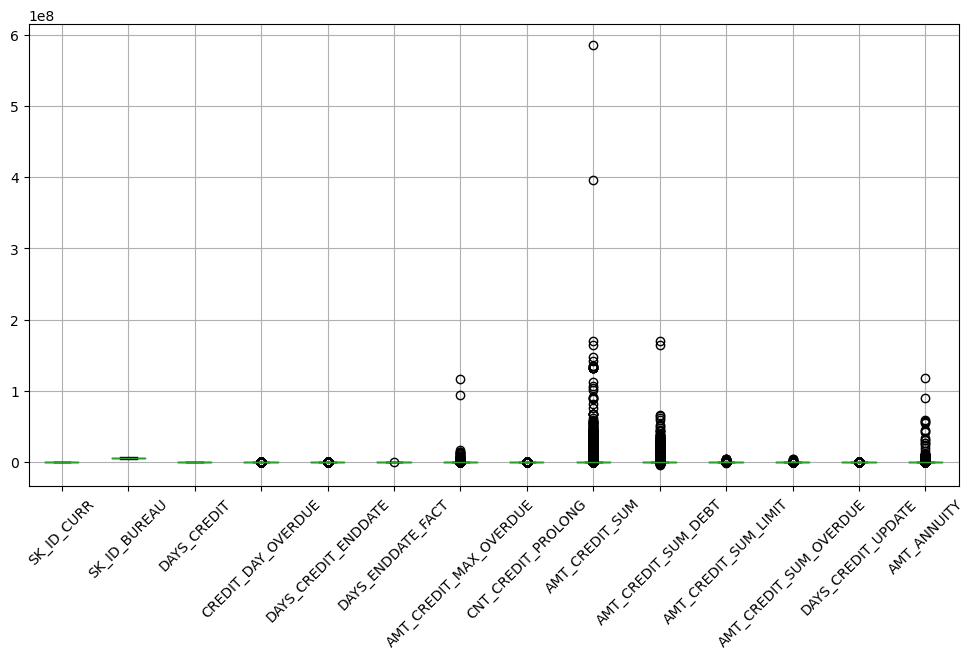

In [17]:
#boxplot of the table
bureau.boxplot(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.show()

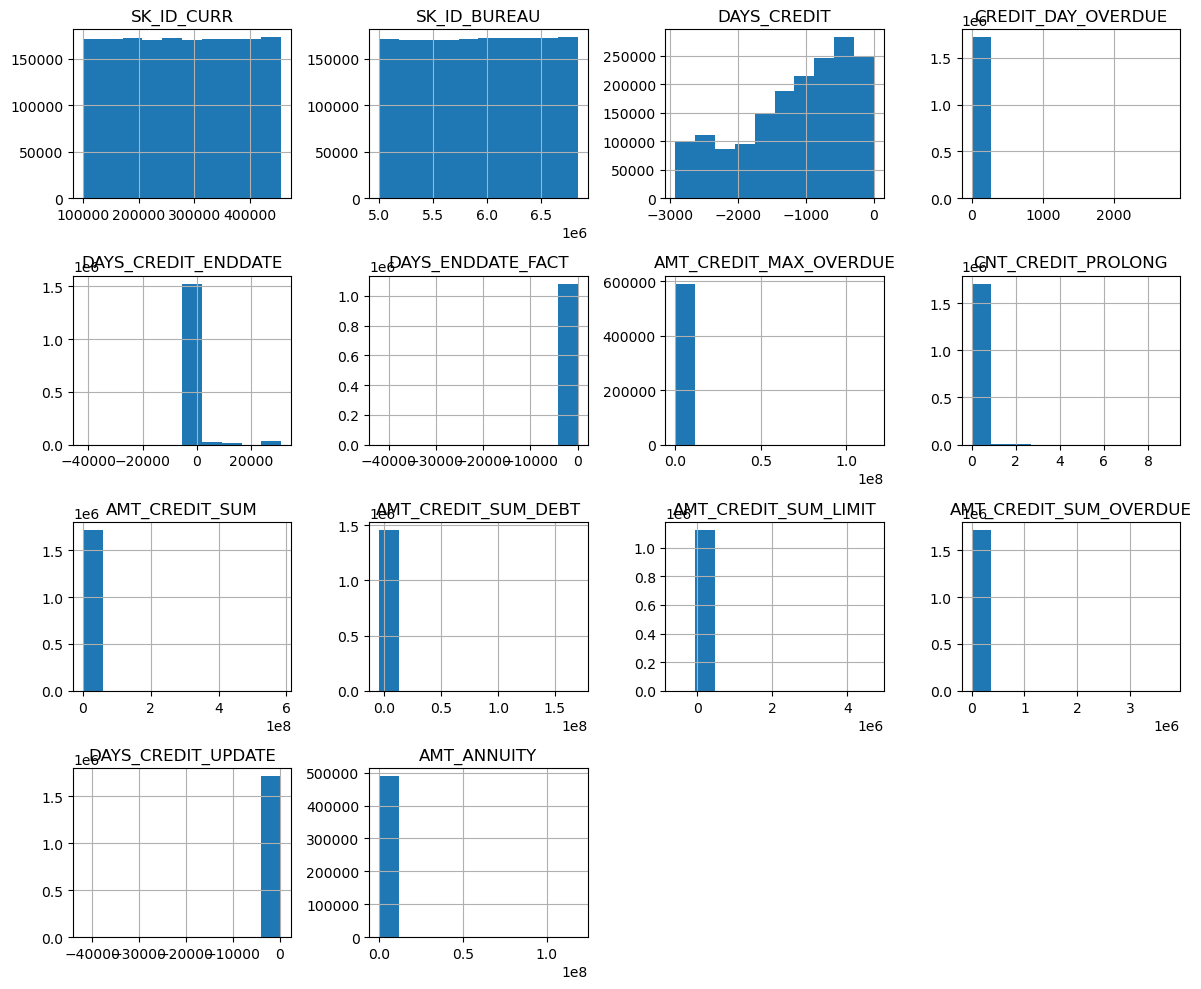

In [18]:
#histograms for each column
bureau.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Data Cleaning

In [52]:
#handling with null values
categorical_columns = ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

for column in categorical_columns:
    bureau[column].fillna(bureau[column].mode()[0], inplace=True)
    
numerical_columns = [
    'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
    'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
    'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY'
]

for column in numerical_columns:
    bureau[column].fillna(bureau[column].median(), inplace=True)

In [53]:
bureau.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
dtype: int64

In [54]:
#handling with outliers
numerical_columns = [
    'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
    'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
    'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY'
]

for column in numerical_columns:
    Q1 = bureau[column].quantile(0.25)
    Q3 = bureau[column].quantile(0.75)
    IQR = Q3 - Q1

    bureau = bureau[(bureau[column] >= Q1 - 1.5 * IQR) & (bureau[column] <= Q3 + 1.5 * IQR)]

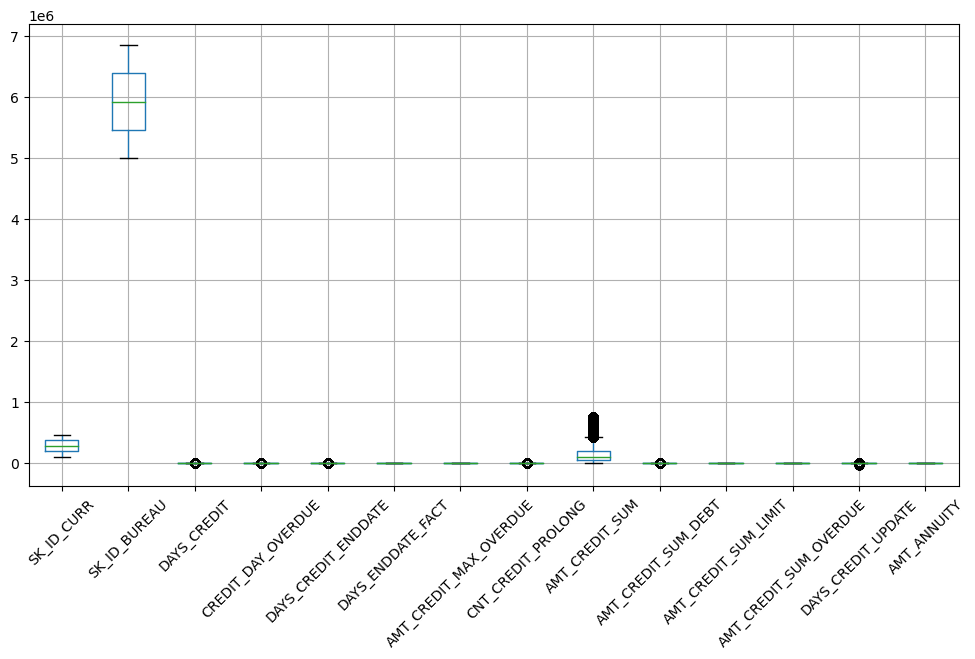

In [55]:
#boxplot of the table
bureau.boxplot(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.show()

In [79]:
#saving cleaned data
bureau.to_csv('data/cleaned/bureau_cleaned.csv', index=False)

## bureau_balance

### Data Exploration

In [19]:
#loading table and displaying
bureau_balance = pd.read_csv('data/bureau_balance.csv')

bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [20]:
#table shape
bureau_balance.shape

(27299925, 3)

In [21]:
#table description
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [23]:
#table info
bureau_balance_dtypes_nulls = pd.DataFrame({
    'missing_bureau': bureau_balance.isnull().sum(),
    'data_types_bureau': bureau_balance.dtypes
})

bureau_balance_dtypes_nulls

,missing_bureau,data_types_bureau
SK_ID_BUREAU,0,int64
MONTHS_BALANCE,0,int64
STATUS,0,object


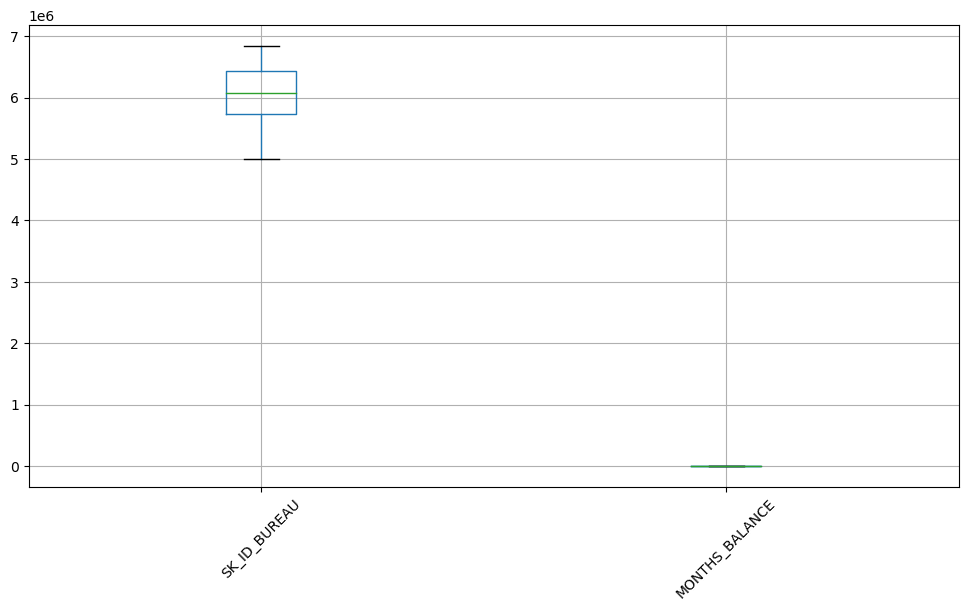

In [24]:
#boxplot of the table
bureau_balance.boxplot(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.show()

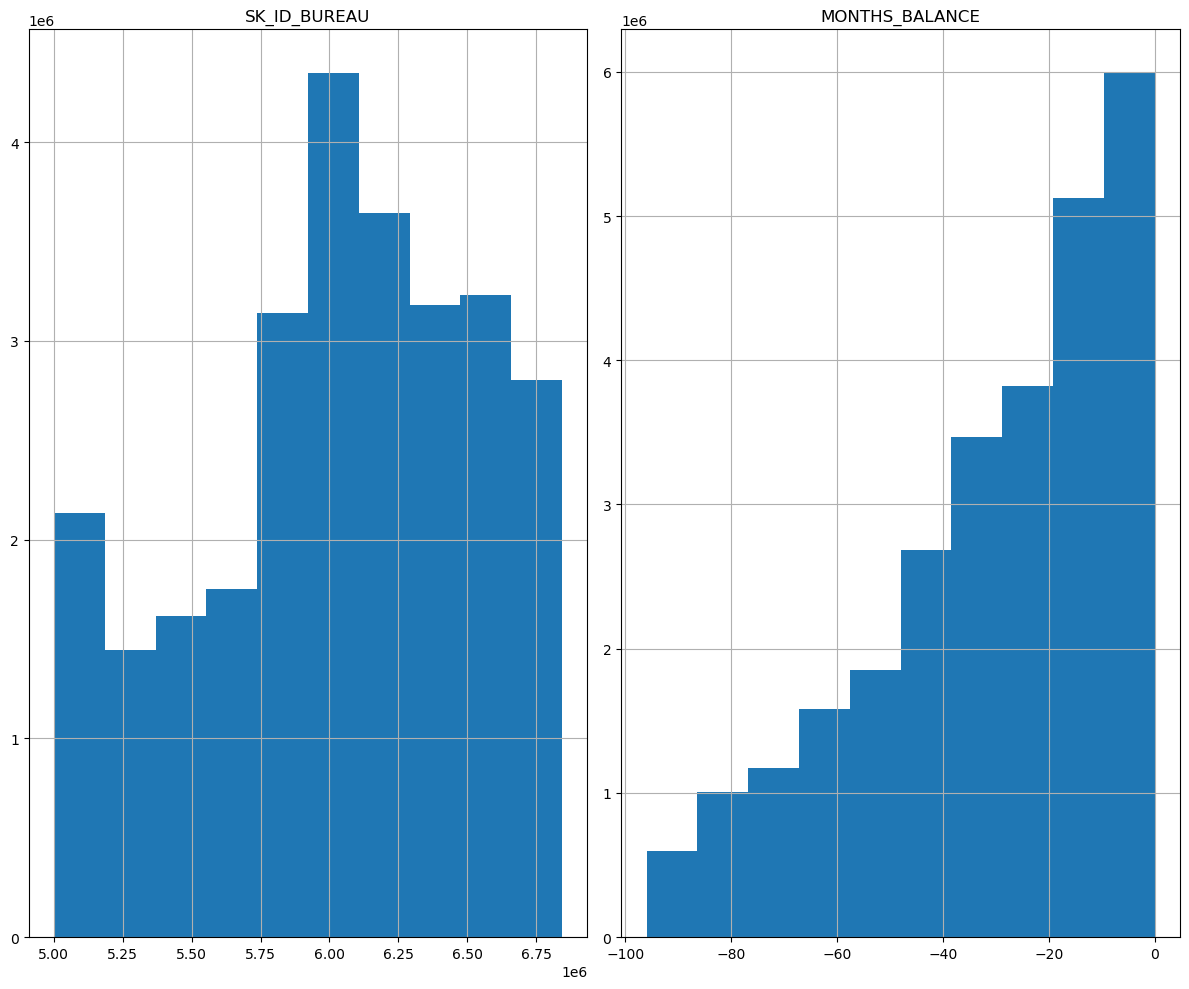

In [25]:
#histograms for each column
bureau_balance.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [80]:
#saving cleaned data
bureau_balance.to_csv('data/cleaned/bureau_balance_cleaned.csv', index=False)

## previous_application

### Data Exploration

In [26]:
#loading table and displaying
previous_application = pd.read_csv('data/previous_application.csv')

previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#table shape
previous_application.shape

(1670214, 37)

In [28]:
#table description
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [29]:
#table info
previous_application_dtypes_nulls = pd.DataFrame({
    'missing_bureau': previous_application.isnull().sum(),
    'data_types_bureau': previous_application.dtypes
})

previous_application_dtypes_nulls

,missing_bureau,data_types_bureau
SK_ID_PREV,0,int64
SK_ID_CURR,0,int64
NAME_CONTRACT_TYPE,0,object
AMT_ANNUITY,372235,float64
AMT_APPLICATION,0,float64
AMT_CREDIT,1,float64
AMT_DOWN_PAYMENT,895844,float64
AMT_GOODS_PRICE,385515,float64
WEEKDAY_APPR_PROCESS_START,0,object
HOUR_APPR_PROCESS_START,0,int64


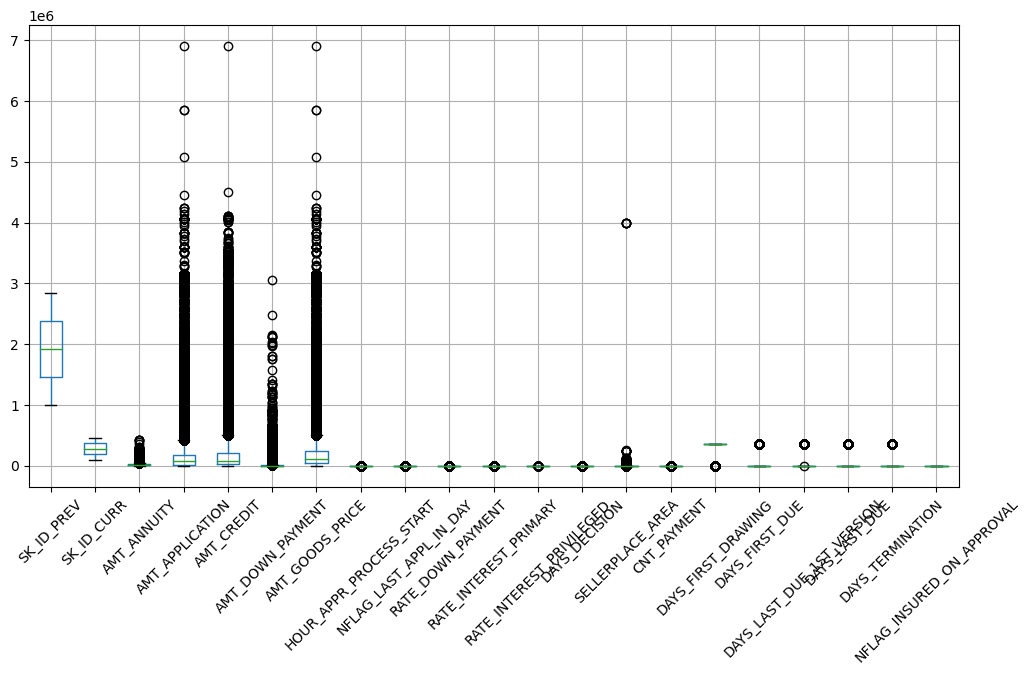

In [31]:
#boxplot of the table
previous_application.boxplot(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.show()

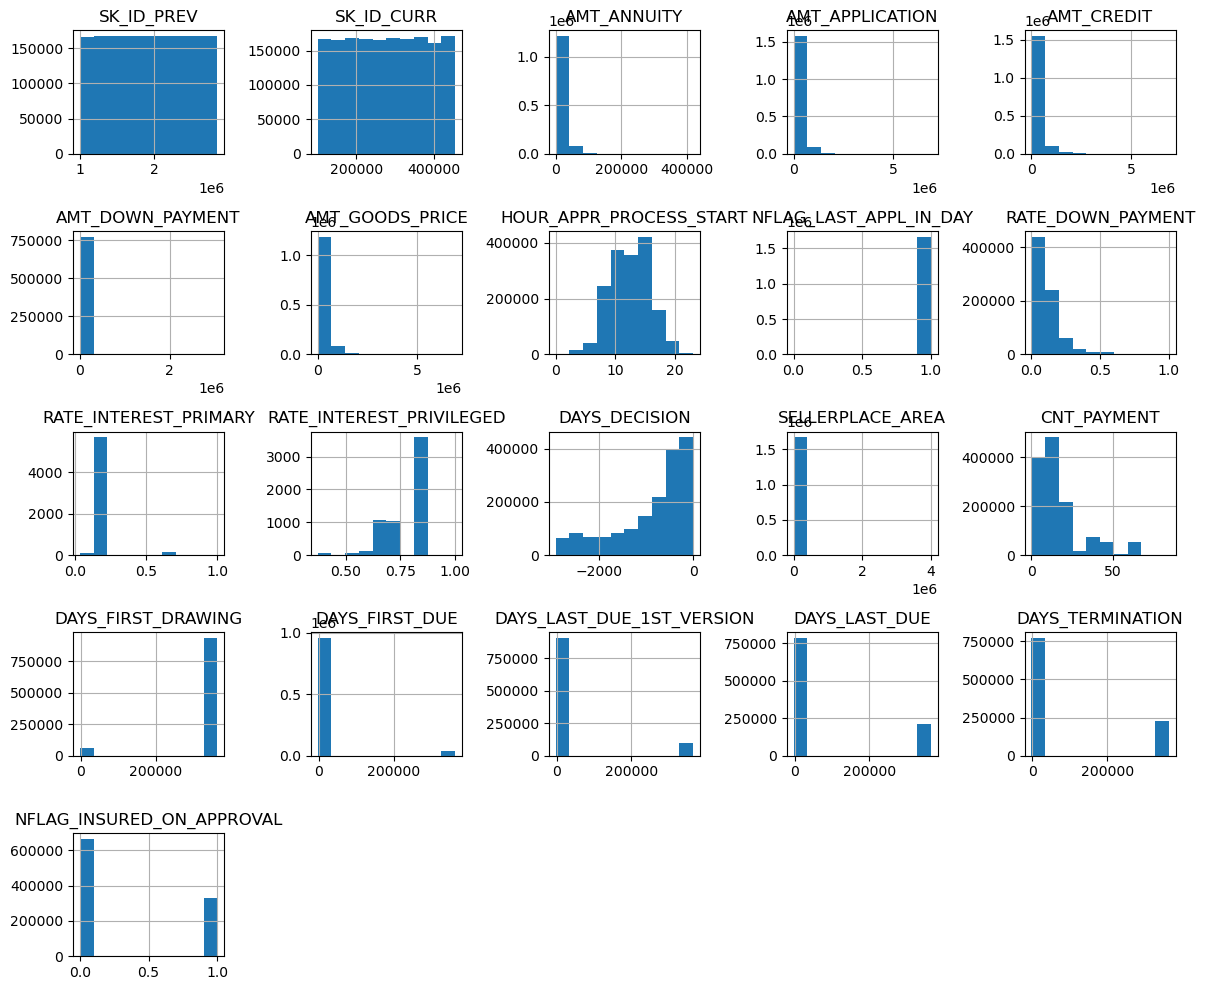

In [32]:
#histograms for each column
previous_application.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Data Cleaning

In [58]:
#handling with null values
numerical_columns = [
    'AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
    'RATE_DOWN_PAYMENT', 'CNT_PAYMENT'
]

for column in numerical_columns:
    previous_application[column].fillna(previous_application[column].median(), inplace=True)

categorical_columns = ['NAME_TYPE_SUITE']

for column in categorical_columns:
    previous_application[column].fillna(previous_application[column].mode()[0], inplace=True)

date_columns = [
    'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'
]

for column in date_columns:
    previous_application[column].fillna(-10000, inplace=True)  
    
previous_application.drop(columns=['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], inplace=True)

previous_application['PRODUCT_COMBINATION'].fillna(previous_application['PRODUCT_COMBINATION'].mode()[0], inplace=True)


In [59]:
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST

In [60]:
#handling with outliers
numerical_columns = [
    'AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
    'RATE_DOWN_PAYMENT', 'CNT_PAYMENT'
]

for column in numerical_columns:
    Q1 = previous_application[column].quantile(0.25)
    Q3 = previous_application[column].quantile(0.75)
    IQR = Q3 - Q1

    previous_application = previous_application[(previous_application[column] >= Q1 - 1.5 * IQR) & (previous_application[column] <= Q3 + 1.5 * IQR)]

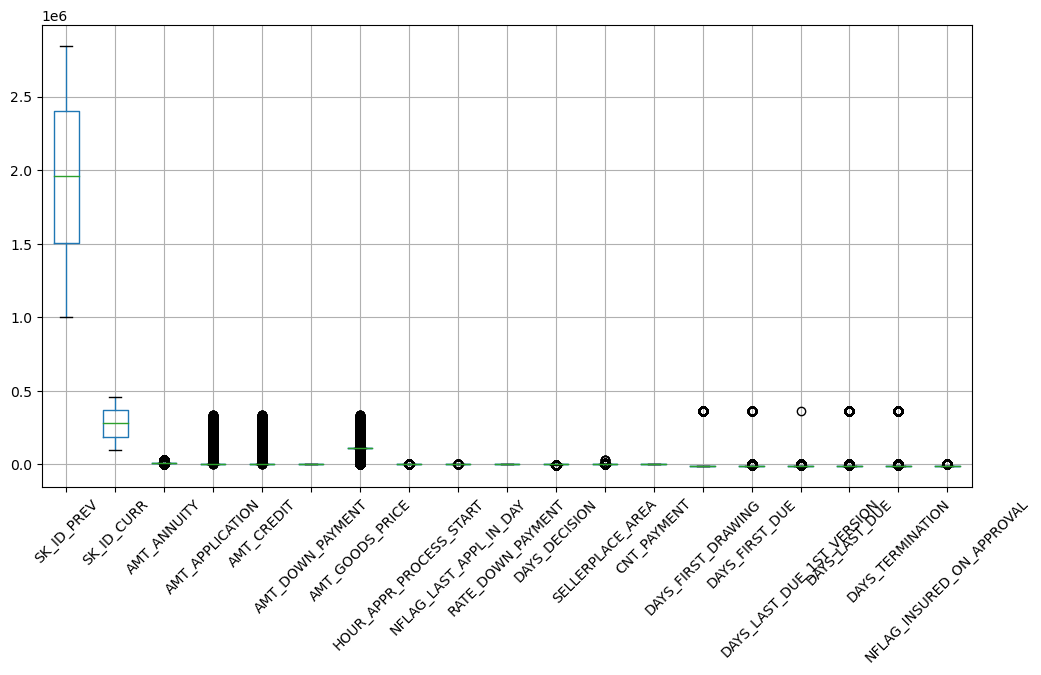

In [61]:
#boxplot of the table
previous_application.boxplot(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.show()

In [81]:
#saving cleaned data
previous_application.to_csv('data/cleaned/previous_application_cleaned.csv', index=False)

## POS_CASH_balance

### Data Exploration

In [34]:
#loading table and displaying
pc_balance = pd.read_csv('data/POS_CASH_balance.csv')

pc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [35]:
#table shape
pc_balance.shape

(10001358, 8)

In [36]:
#table description
pc_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [37]:
#table info
pc_balance_dtypes_nulls = pd.DataFrame({
    'missing_bureau': pc_balance.isnull().sum(),
    'data_types_bureau': pc_balance.dtypes
})

pc_balance_dtypes_nulls

,missing_bureau,data_types_bureau
SK_ID_PREV,0,int64
SK_ID_CURR,0,int64
MONTHS_BALANCE,0,int64
CNT_INSTALMENT,26071,float64
CNT_INSTALMENT_FUTURE,26087,float64
NAME_CONTRACT_STATUS,0,object
SK_DPD,0,int64
SK_DPD_DEF,0,int64


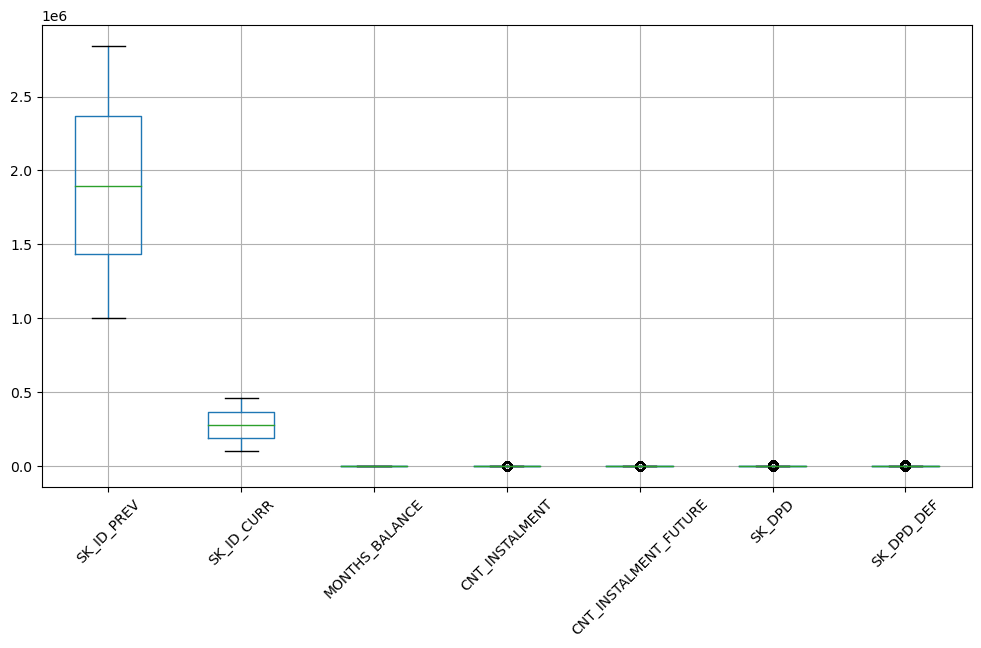

In [38]:
#boxplot of the table
pc_balance.boxplot(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.show()

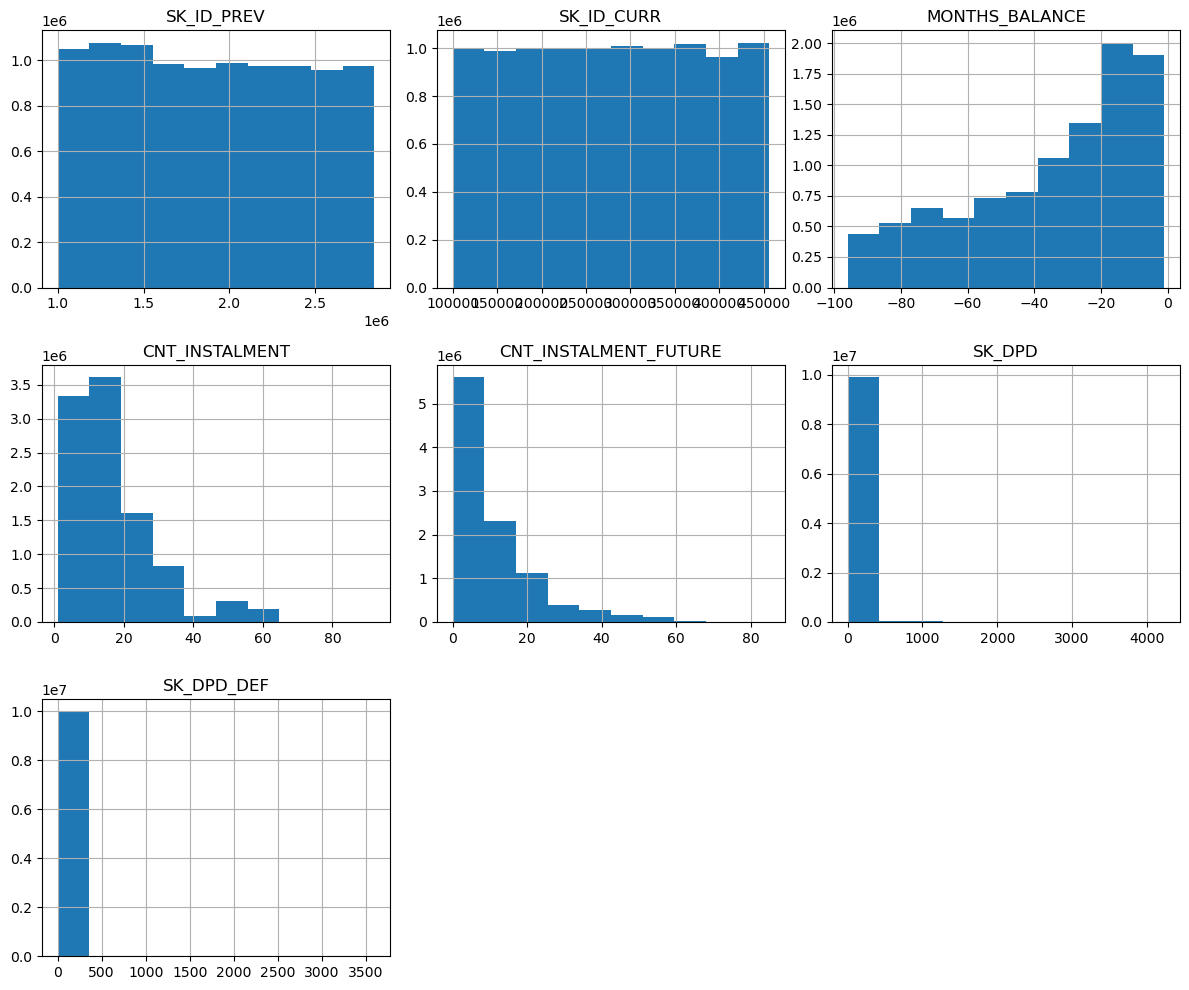

In [39]:
#histograms for each column
pc_balance.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Data Cleaning

In [63]:
#handling with null values
numerical_columns = ['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']

for column in numerical_columns:
    pc_balance[column].fillna(pc_balance[column].median(), inplace=True)

In [64]:
pc_balance.isnull().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64

In [70]:
# #handling with outliers
# numerical_columns = ['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']

# for column in numerical_columns:
#     Q1 = pc_balance[column].quantile(0.25)
#     Q3 = pc_balance[column].quantile(0.75)
#     IQR = Q3 - Q1

#     pc_balance = pc_balance[(pc_balance[column] >= Q1 - 1.5 * IQR) & (pc_balance[column] <= Q3 + 1.5 * IQR)]

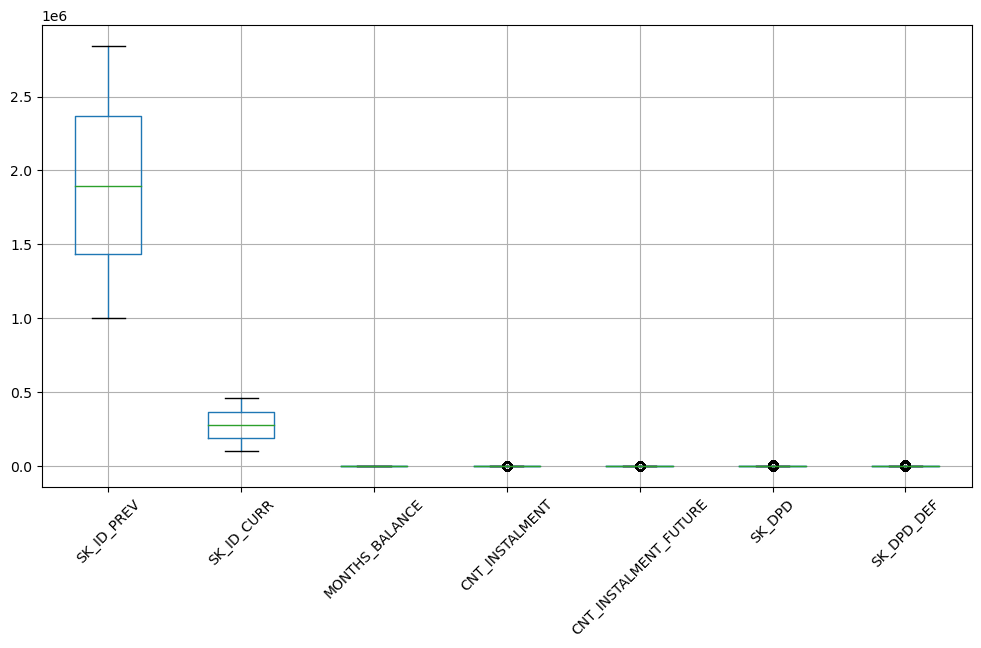

In [71]:
# #boxplot of the table
# pc_balance.boxplot(figsize=(12, 6))
# plt.xticks(rotation=45) 
# plt.show()

In [82]:
#saving cleaned data
pc_balance.to_csv('data/cleaned/pc_balance_cleaned.csv', index=False)

## credit_card_balance

### Data Exploration

In [40]:
#loading table and displaying
cc_balance = pd.read_csv('data/credit_card_balance.csv')

cc_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [41]:
#table shape
cc_balance.shape

(3840312, 23)

In [42]:
#table description
cc_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [43]:
#table info
cc_balance_dtypes_nulls = pd.DataFrame({
    'missing_bureau': cc_balance.isnull().sum(),
    'data_types_bureau': cc_balance.dtypes
})

cc_balance_dtypes_nulls

,missing_bureau,data_types_bureau
SK_ID_PREV,0,int64
SK_ID_CURR,0,int64
MONTHS_BALANCE,0,int64
AMT_BALANCE,0,float64
AMT_CREDIT_LIMIT_ACTUAL,0,int64
AMT_DRAWINGS_ATM_CURRENT,749816,float64
AMT_DRAWINGS_CURRENT,0,float64
AMT_DRAWINGS_OTHER_CURRENT,749816,float64
AMT_DRAWINGS_POS_CURRENT,749816,float64
AMT_INST_MIN_REGULARITY,305236,float64


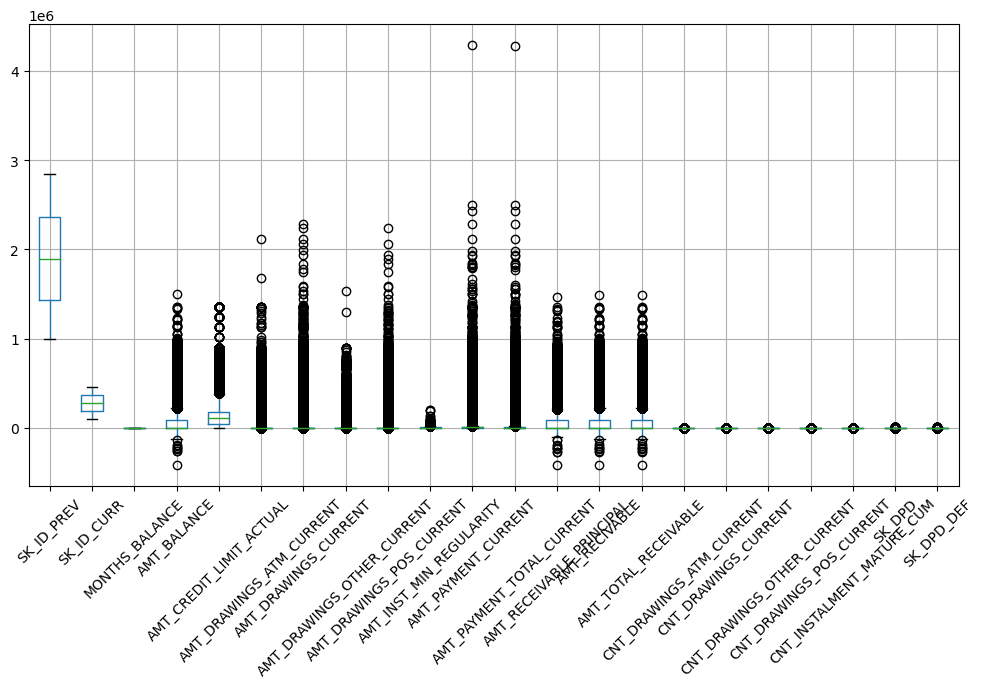

In [44]:
#boxplot of the table
cc_balance.boxplot(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.show()

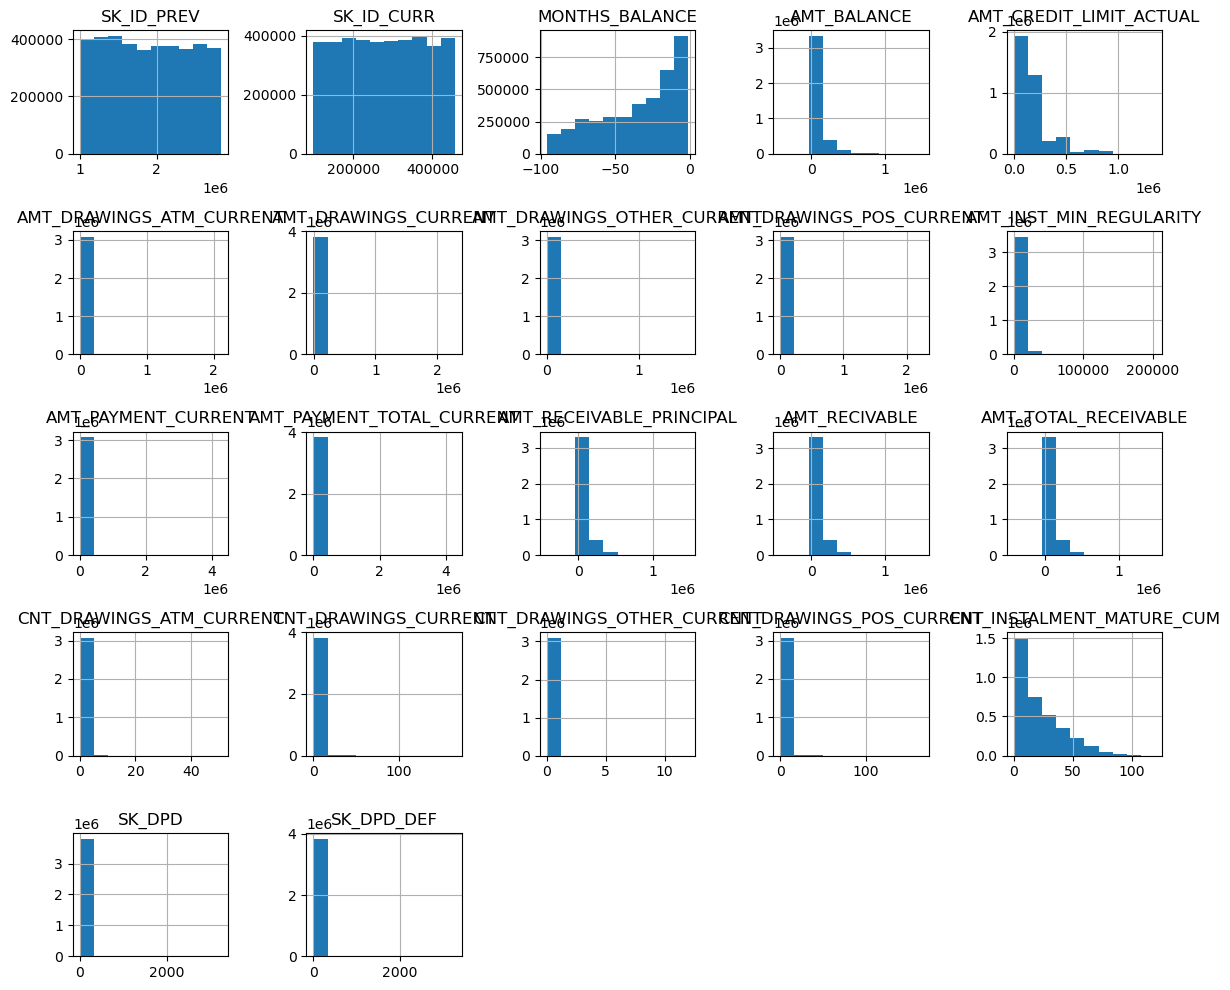

In [45]:
#histograms for each column
cc_balance.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Data Cleaning

In [66]:
#handling with null values
zero_fill_columns = [
    'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
    'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT'
]

for column in zero_fill_columns:
    cc_balance[column].fillna(0, inplace=True)

numerical_columns = [
    'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'CNT_INSTALMENT_MATURE_CUM'
]

for column in numerical_columns:
    cc_balance[column].fillna(cc_balance[column].median(), inplace=True)

In [67]:
cc_balance.isnull().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
MONTHS_BALANCE                0
AMT_BALANCE                   0
AMT_CREDIT_LIMIT_ACTUAL       0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_INST_MIN_REGULARITY       0
AMT_PAYMENT_CURRENT           0
AMT_PAYMENT_TOTAL_CURRENT     0
AMT_RECEIVABLE_PRINCIPAL      0
AMT_RECIVABLE                 0
AMT_TOTAL_RECEIVABLE          0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
CNT_INSTALMENT_MATURE_CUM     0
NAME_CONTRACT_STATUS          0
SK_DPD                        0
SK_DPD_DEF                    0
dtype: int64

In [68]:
#handling with outliers
numerical_columns = [
    'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
    'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
    'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
    'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
    'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
    'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM'
]

for column in numerical_columns:
    Q1 = cc_balance[column].quantile(0.25)
    Q3 = cc_balance[column].quantile(0.75)
    IQR = Q3 - Q1

    cc_balance = cc_balance[(cc_balance[column] >= Q1 - 1.5 * IQR) & (cc_balance[column] <= Q3 + 1.5 * IQR)]

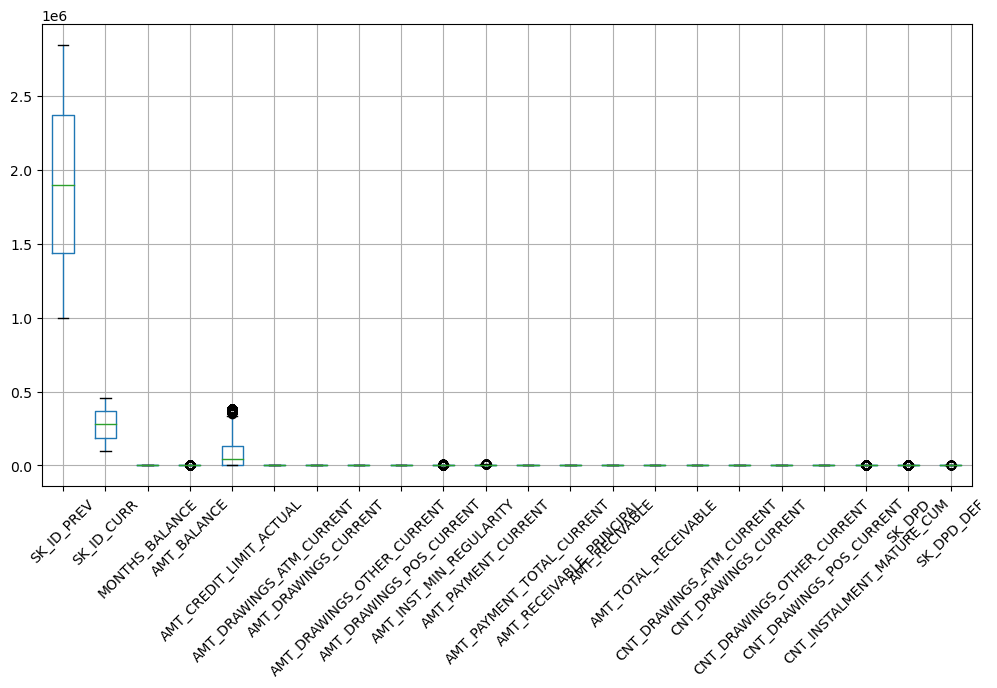

In [69]:
#boxplot of the table
cc_balance.boxplot(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.show()

In [83]:
#saving cleaned data
cc_balance.to_csv('data/cleaned/cc_balance_cleaned.csv', index=False)

## installments_payments

### Data Exploration

In [46]:
#loading table and displaying
installments_payments = pd.read_csv('data/installments_payments.csv')

installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [47]:
#table shape
installments_payments.shape

(13605401, 8)

In [48]:
#table description
installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [74]:
#table info
installments_payments_dtypes_nulls = pd.DataFrame({
    'missing_bureau': installments_payments.isnull().sum(),
    'data_types_bureau': installments_payments.dtypes
})

installments_payments_dtypes_nulls

,missing_bureau,data_types_bureau
SK_ID_PREV,0,int64
SK_ID_CURR,0,int64
NUM_INSTALMENT_VERSION,0,float64
NUM_INSTALMENT_NUMBER,0,int64
DAYS_INSTALMENT,0,float64
DAYS_ENTRY_PAYMENT,2905,float64
AMT_INSTALMENT,0,float64
AMT_PAYMENT,2905,float64


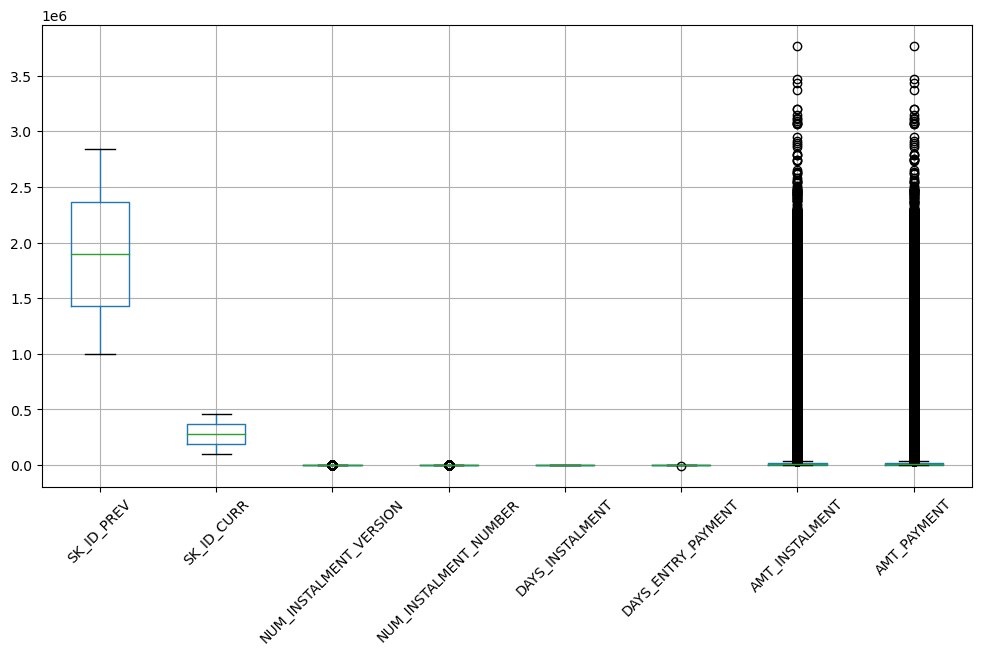

In [50]:
#boxplot of the table
installments_payments.boxplot(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.show()

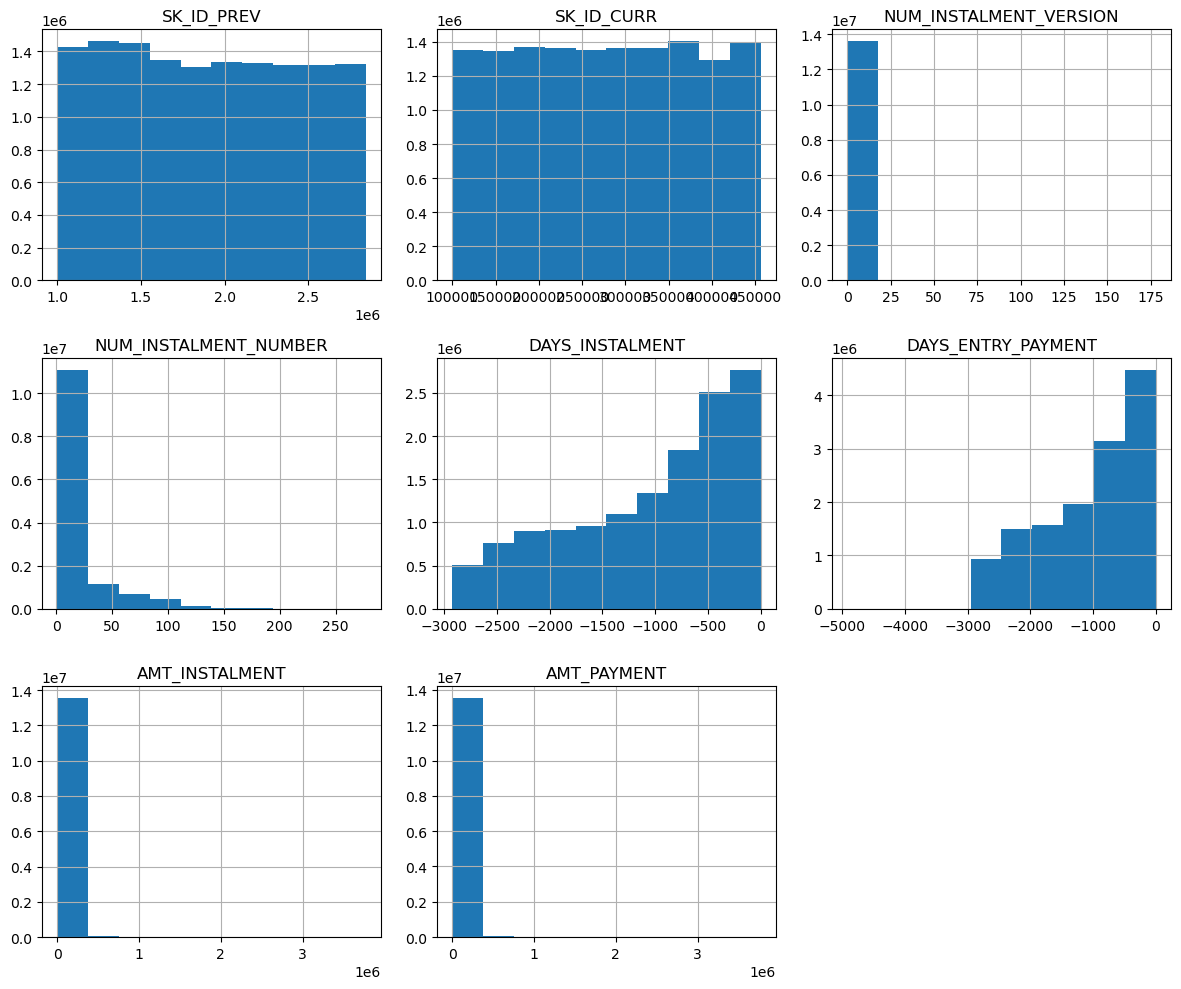

In [51]:
#histograms for each column
installments_payments.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Data Cleaning

In [75]:
#handling with null values
numerical_columns = ['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT']

for column in numerical_columns:
    installments_payments[column].fillna(installments_payments[column].median(), inplace=True)

In [76]:
installments_payments.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

In [77]:
#handling with outliers
numerical_columns = [
    'AMT_INSTALMENT', 'AMT_PAYMENT'
]

for column in numerical_columns:
    Q1 = installments_payments[column].quantile(0.25)
    Q3 = installments_payments[column].quantile(0.75)
    IQR = Q3 - Q1

    installments_payments = installments_payments[(installments_payments[column] >= Q1 - 1.5 * IQR) & (installments_payments[column] <= Q3 + 1.5 * IQR)]

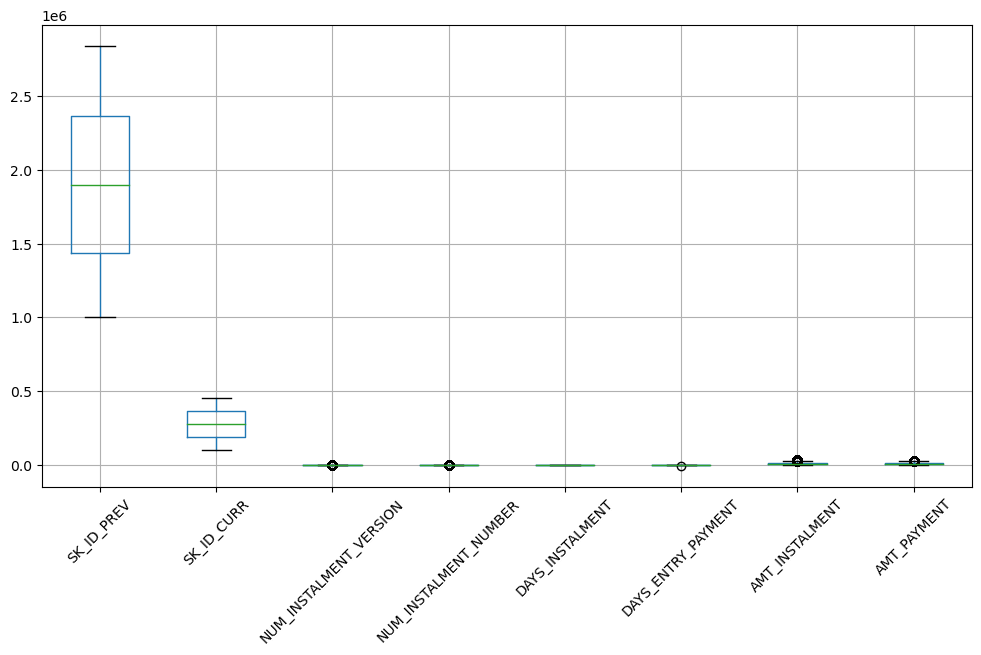

In [78]:
#boxplot of the table
installments_payments.boxplot(figsize=(12, 6))
plt.xticks(rotation=45) 
plt.show()

In [ ]:
#saving cleaned data
installments_payments.to_csv('data/cleaned/installments_payments_cleaned.csv', index=False)